In [1]:
#Installing packages 
!pip install cftime
!pip install utils
!pip install netCDF4 
!pip install scipy
!pip install "xarray[io]"
!pip install "dask[dataframe]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 54.0 MB/s 
     |████████████████████████████████| 185 kB 53.1 MB/s 
     |████████████████████████████████| 2.3 MB 33.0 MB/s 
     |████████████████████████████████| 140 kB 81.9 MB/s 
     |████████████████████████████████| 45 kB 3.7 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 114 kB 42.8 MB/s 
     |████████████████████████████████| 6.6 MB 29.0 MB/s 
  Created wheel for eccodes: filename=eccode

In [2]:
#importing Libraries
import pandas as pd
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import dask.dataframe as dd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.7/dist-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [4]:
path2 = ('mock_v3.nc')
data = xr.open_dataset(path2) # To view time in datetime format
data

<xarray.Dataset>
Dimensions:  (time: 20, lat: 10, lon: 10)
Dimensions without coordinates: time, lat, lon
Data variables:
    sst      (time, lat, lon) float64 ...
    t2m      (time, lat, lon) float64 ...

In [5]:
dask_df = data.to_dask_dataframe(dim_order=None, set_index=False)
dd = dask_df.compute()

In [6]:
# For mock data
sst_data_trans = pd.DataFrame()
t2m_data_trans = pd.DataFrame()

for i in range(0,dd.shape[0]):
  b=('sst'+'('+str(dd.lat[i])+','+str(dd.lon[i])+')')
  c=('t2m'+'('+str(dd.lat[i])+','+str(dd.lon[i])+')')

  sst_data_trans.loc[dd.time[i], b] = dd.sst[i]
  t2m_data_trans.loc[dd.time[i], c] = dd.t2m[i]
  


In [7]:
#Concating the variables 
trans_concat = pd.concat([ t2m_data_trans, sst_data_trans ], axis=1)

In [8]:
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
trans_concat_scaled = scaler.fit_transform(trans_concat)

# statistics of scaled data
pd.DataFrame(trans_concat_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
count,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-3.330669e-17,-3.330669e-17,-3.330669e-17,-3.330669e-17,-3.330669e-17,-2.220446e-17,-2.220446e-17,-2.220446e-17,-2.220446e-17,-2.220446e-17,...,5.551115e-18,5.551115e-18,5.551115e-18,5.551115e-18,5.551115e-18,0.000000,0.000000,0.000000,0.000000,0.000000
std,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,...,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978e+00,1.025978,1.025978,1.025978,1.025978,1.025978
min,-1.264911e+00,-1.264911e+00,-1.264911e+00,-1.264911e+00,-1.264911e+00,-1.264911e+00,-1.264911e+00,-1.264911e+00,-1.264911e+00,-1.264911e+00,...,-9.089406e-01,-9.089406e-01,-9.089406e-01,-9.089406e-01,-9.089406e-01,-0.908941,-0.908941,-0.908941,-0.908941,-0.908941
25%,-7.905694e-01,-7.905694e-01,-7.905694e-01,-7.905694e-01,-7.905694e-01,-7.905694e-01,-7.905694e-01,-7.905694e-01,-7.905694e-01,-7.905694e-01,...,-8.998208e-01,-8.998208e-01,-8.998208e-01,-8.998208e-01,-8.998208e-01,-0.899821,-0.899821,-0.899821,-0.899821,-0.899821
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-3.009536e-01,-3.009536e-01,-3.009536e-01,-3.009536e-01,-3.009536e-01,-0.300954,-0.300954,-0.300954,-0.300954,-0.300954
75%,7.905694e-01,7.905694e-01,7.905694e-01,7.905694e-01,7.905694e-01,7.905694e-01,7.905694e-01,7.905694e-01,7.905694e-01,7.905694e-01,...,5.988672e-01,5.988672e-01,5.988672e-01,5.988672e-01,5.988672e-01,0.598867,0.598867,0.598867,0.598867,0.598867
max,1.264911e+00,1.264911e+00,1.264911e+00,1.264911e+00,1.264911e+00,1.264911e+00,1.264911e+00,1.264911e+00,1.264911e+00,1.264911e+00,...,1.510848e+00,1.510848e+00,1.510848e+00,1.510848e+00,1.510848e+00,1.510848,1.510848,1.510848,1.510848,1.510848


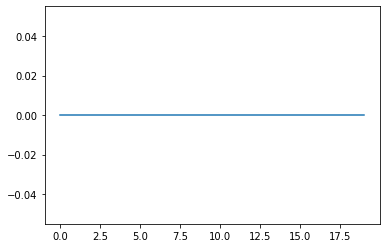

In [9]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(trans_concat_scaled)
distances, indices = neighbors_fit.kneighbors(trans_concat_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [10]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.7/dist-packages/kneed/knee_locator.py:218: RuntimeWarning: invalid value encountered in true_divide
  return (a - min(a)) / (max(a) - min(a))
/usr/local/lib/python3.7/dist-packages/kneed/knee_locator.py:242: RuntimeWarning: No local maxima found in the difference curve
The line is probably not polynomial, try plotting
the difference curve with plt.plot(knee.x_difference, knee.y_difference)
Also check that you aren't mistakenly setting the curve argument
  RuntimeWarning,


<Figure size 360x360 with 0 Axes>

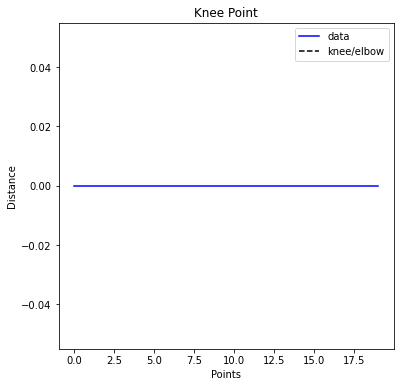

In [11]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])


In [14]:
#Performing the DBSCAN 
db = DBSCAN().fit(trans_concat)
labels = db.labels_

In [15]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % silhouette_score(trans_concat_scaled, labels))


Estimated number of clusters: 4
Estimated number of noise points: 0
Silhouette Coefficient: 1.000


In [16]:
#Numbering which days belong to which cluster
frame = pd.DataFrame(trans_concat_scaled)
frame['cluster'] = labels
frame['cluster'].value_counts()

0    5
1    5
2    5
3    5
Name: cluster, dtype: int64

In [18]:
labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])